In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [50]:
fake = pd.read_csv("dataset/Fake_database.csv")
true = pd.read_csv("dataset/True_database.csv")

In [51]:
fake['label'] = 0  # Fake news
true['label'] = 1  # True news

In [52]:
data = pd.concat([fake, true], ignore_index=True)

In [53]:
# Combine title and text columns into one
data['combined'] = data['Title'] + " " + data['Text']
X = data['combined']
y = data['label']

In [54]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_df=0.75)
X = vectorizer.fit_transform(X)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Random Forest

Accuracy: 0.9944903581267218
Precision: 0.9944444444444445
Recall: 0.9944444444444445
F1 Score: 0.9944444444444445


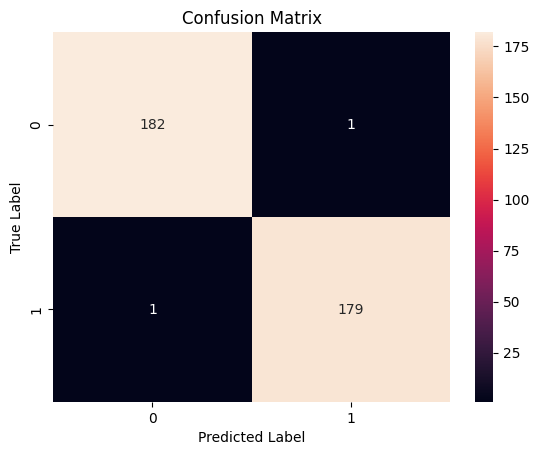

In [19]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate model
y_pred = rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)        
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

class_labels = [0, 1]
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Random Forest (Fine Tune)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


Best parameters found by GridSearchCV: {'criterion': 'entropy', 'max_leaf_nodes': 8, 'min_samples_split': 2}
Accuracy: 0.9917355371900827
Precision: 0.9836065573770492
Recall: 1.0
F1 Score: 0.9917355371900827


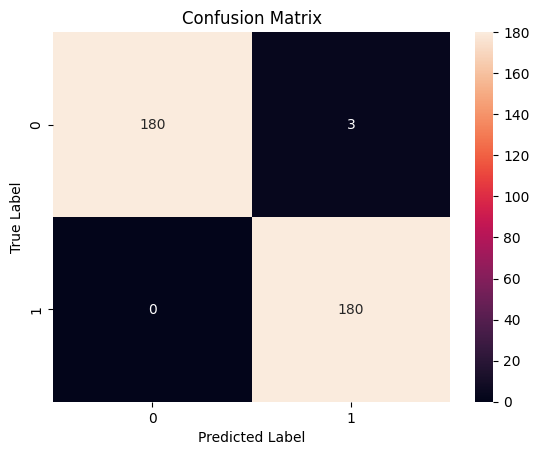

In [58]:
params = {
    'max_leaf_nodes': list(range(8, 10)),
    'min_samples_split': [2, 3],
    'criterion': ['gini', 'entropy']
}

grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

# Best parameters found by GridSearchCV
best_params = grid_search_cv.best_params_
print("Best parameters found by GridSearchCV:", best_params)

# Get the best model
best_rf_model = grid_search_cv.best_estimator_

# Evaluate model
y_pred = best_rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)        
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

class_labels = [0, 1]
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Passive Aggresif Classifier

Accuracy: 0.9917355371900827
Precision: 0.988950276243094
Recall: 0.9944444444444445
F1 Score: 0.9916897506925207


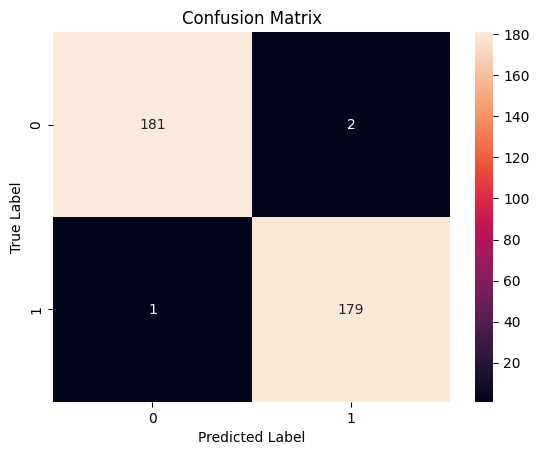

In [61]:
pac = PassiveAggressiveClassifier(max_iter=10, random_state=42)
pac.fit(X_train, y_train)

# Evaluate model
y_pred = pac.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Visualize the confusion matrix
class_labels = [0, 1]
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Passive Aggresif Clasifier (Fine Tune)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Best parameters found by GridSearchCV: {'C': 0.1, 'max_iter': 50, 'tol': 0.001}
Accuracy: 0.9944903581267218
Precision: 0.9944444444444445
Recall: 0.9944444444444445
F1 Score: 0.9944444444444445


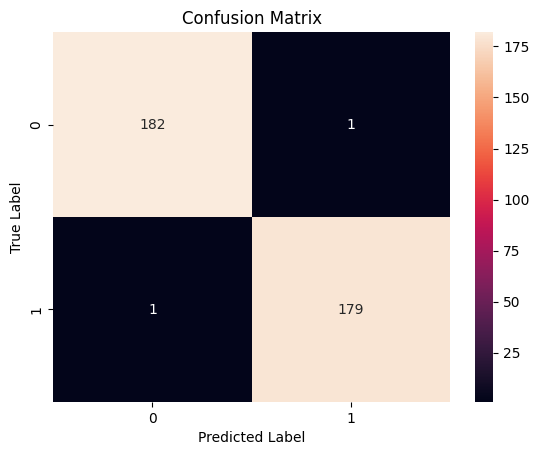

In [64]:
params = {
    'C': [0.1, 0.5, 1.0, 5.0, 10.0, 20.0],
    'max_iter': [50, 100, 500, 1000, 2000],
    'tol': [1e-3, 1e-4, 1e-5, 1e-6]
}


grid_search_cv = GridSearchCV(PassiveAggressiveClassifier(random_state=42), params, cv=3, verbose=1, n_jobs=-1)
grid_search_cv.fit(X_train, y_train)

# Best parameters found by GridSearchCV
best_params = grid_search_cv.best_params_
print("Best parameters found by GridSearchCV:", best_params)

# Get the best model
best_PAC_model = grid_search_cv.best_estimator_

# Evaluate model
y_pred = best_PAC_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Visualize the confusion matrix
class_labels = [0, 1]
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

KNN

Accuracy: 0.9393939393939394
Precision: 0.9157894736842105
Recall: 0.9666666666666667
F1 Score: 0.9405405405405406


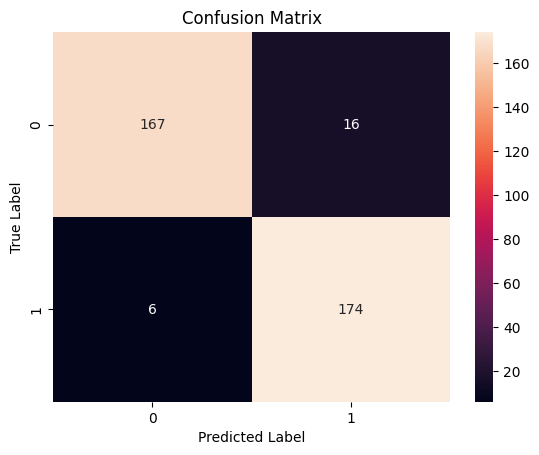

In [56]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Evaluate model
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Visualize the confusion matrix
class_labels = [0, 1]
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


KNN (Fine Tune)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Accuracy: 0.9449035812672176
Precision: 0.9166666666666666
Recall: 0.9777777777777777
F1 Score: 0.946236559139785


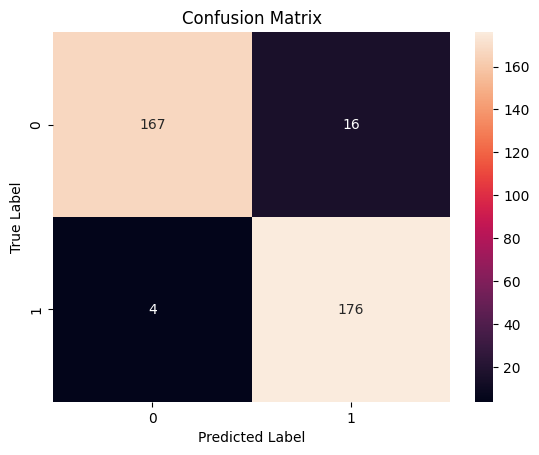

In [60]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust the number of neighbors
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize KNeighborsClassifier
knn = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best model
best_knn_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_knn_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Visualize the confusion matrix
class_labels = [0, 1]
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


RNN

c:\Users\Filbert\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6498 - loss: 0.6792 - val_accuracy: 0.9349 - val_loss: 0.5206
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 835ms/step - accuracy: 0.9357 - loss: 0.4233 - val_accuracy: 0.9822 - val_loss: 0.1823
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 821ms/step - accuracy: 0.9784 - loss: 0.1698 - val_accuracy: 0.9704 - val_loss: 0.0996
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 822ms/step - accuracy: 0.9894 - loss: 0.0581 - val_accuracy: 0.9822 - val_loss: 0.0667
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 796ms/step - accuracy: 0.9993 - loss: 0.0303 - val_accuracy: 0.9822 - val_loss: 0.0611
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step
Accuracy: 0.9807162534435262
Precision: 0.9779005524861878
Recall: 0.9833333333333333
F1 Score: 0.9806094182825484


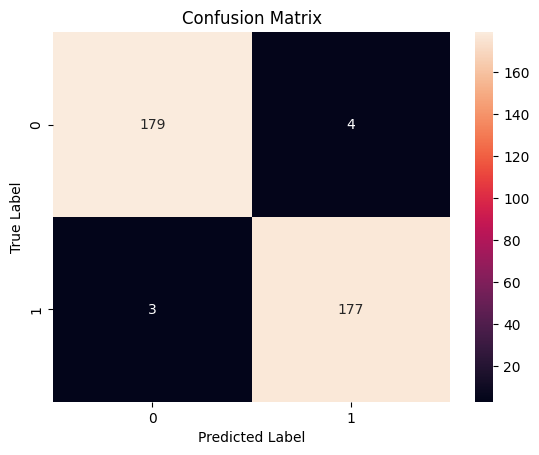

In [23]:
data['Title'] = data['Title'].fillna('')
data['Text'] = data['Text'].fillna('')
data['combined'] = data['Title'] + " " + data['Text']

# Check for any remaining null values
# print(data.isnull().sum())

X = data['combined']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tokenize and pad the sequences
max_words = 20000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(sequences_train, maxlen=max_len)
X_test_padded = pad_sequences(sequences_test, maxlen=max_len)

# Build RNN
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate model
y_pred_prob = model.predict(X_test_padded)
y_pred = (y_pred_prob > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Visualize the confusion matrix
class_labels = [0, 1]
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


RNN (Fine Tune)

Fail

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

# Load the datasets
fake = pd.read_csv("dataset/Fake_database.csv")
true = pd.read_csv("dataset/True_database.csv")

# Preprocess the data
fake['label'] = 0
true['label'] = 1
data = pd.concat([fake, true]).reset_index(drop=True)
data['combined'] = data['Title'].fillna('') + " " + data['Text'].fillna('')
data = data[['combined', 'label']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['combined'], data['label'], test_size=0.3, random_state=42)

# Tokenize and pad the sequences
max_words = 20000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(sequences_train, maxlen=max_len)
X_test_padded = pad_sequences(sequences_test, maxlen=max_len)

# Define the model creation function
def create_model(lstm_units=128, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
    model.add(LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=1)

# Define the parameter grid
param_grid = {
    'model__lstm_units': [64, 128, 256],
    'model__dropout_rate': [0.2, 0.3, 0.4],
    'batch_size': [32, 64, 128],
    'epochs': [5, 10],
    'model__learning_rate': [0.001, 0.0001]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, verbose=1, n_jobs=-1)

# Fit the search
random_search_result = random_search.fit(X_train_padded, y_train)

# Summarize the results
print(f"Best score: {random_search_result.best_score_} using {random_search_result.best_params_}")

# Evaluate the best model
best_model = random_search_result.best_estimator_
y_pred_prob = best_model.predict(X_test_padded)
y_pred = (y_pred_prob > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Visualize the confusion matrix
class_labels = [0, 1]
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=class_labels, columns=class_labels)
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Transformer

In [66]:
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the datasets
fake = pd.read_csv("dataset/Fake_database.csv")
true = pd.read_csv("dataset/True_database.csv")

# Step 2: Preprocess the data
fake['label'] = 0
true['label'] = 1

data = pd.concat([fake, true]).reset_index(drop=True)
data['Text'] = data['Title'] + " " + data['Text']  # Adjust according to actual column names
data = data[['Text', 'label']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['label'], test_size=0.3, random_state=42)

# Step 3: Tokenize the text
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128)

train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), list(y_train)))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), list(y_test)))

# Step 4: Build the model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# Step 5: Compile and train the model
optimizer = Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])

history = model.fit(train_dataset.shuffle(1000).batch(16), epochs=3, batch_size=64, validation_data=test_dataset.batch(16))

# Step 6: Evaluate the model
y_pred_prob = model.predict(test_dataset.batch(16)).logits
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = [0, 1]
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


ImportError: 
TFBertForSequenceClassification requires the TensorFlow library but it was not found in your environment.
However, we were able to find a PyTorch installation. PyTorch classes do not begin
with "TF", but are otherwise identically named to our TF classes.
If you want to use PyTorch, please use those classes instead!

If you really do want to use TensorFlow, please follow the instructions on the
installation page https://www.tensorflow.org/install that match your environment.
